In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data Collection/loading and processing.

In [4]:
titanic_data = pd.read_csv('titanic_train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#remove missing/null values
#replacing missing values with mean number

In [9]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<Axes: >

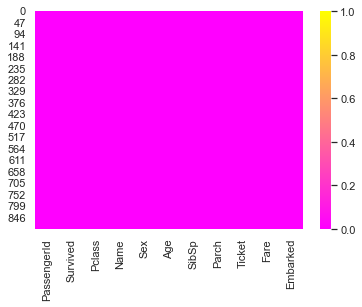

In [26]:
sns.heatmap(titanic_data.isnull(), cmap='spring')

In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#how many survived?
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#visualizing data

In [16]:
sns.set()

C:\Users\charu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Survived', ylabel='count'>

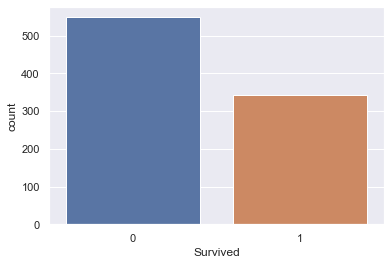

In [17]:
sns.countplot(titanic_data['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

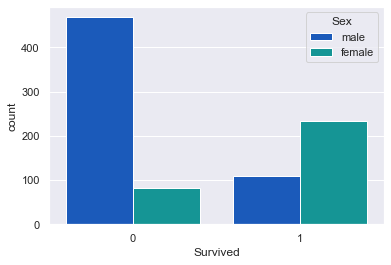

In [19]:
sns.countplot(x='Survived',hue ='Sex' ,data=titanic_data, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

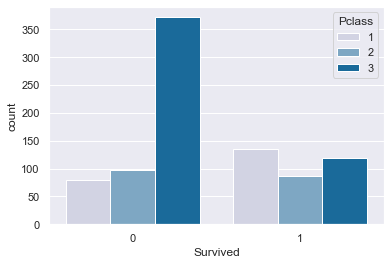

In [20]:
sns.countplot(x='Survived',hue ='Pclass' ,data=titanic_data, palette='PuBu')

<Axes: ylabel='Frequency'>

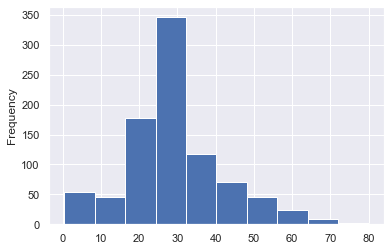

In [22]:
titanic_data['Age'].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

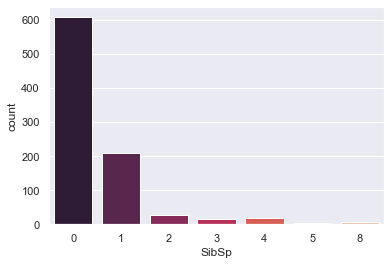

In [23]:
sns.countplot(x='SibSp' ,data=titanic_data, palette='rocket')

<Axes: xlabel='Pclass', ylabel='Age'>

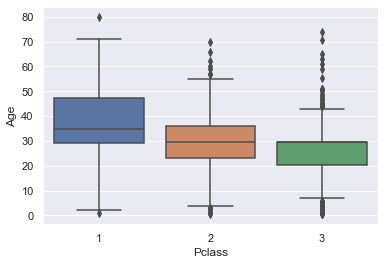

In [27]:
sns.boxplot(x='Pclass', y='Age' , data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

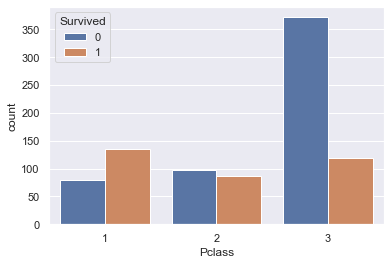

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [29]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

#Train data
#converting to categorical data

In [55]:
pd.get_dummies(titanic_data['Sex']).head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [56]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)

In [57]:
sex.head(3)

,1
0,0
1,1
2,1


In [59]:
embark = pd.get_dummies(titanic_data['Embarked'])

In [60]:
embark.head(3)

,0.0,1.0,2.0
0,1,0,0
1,0,1,0
2,1,0,0


In [63]:
embark= pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [64]:
embark.head(3)

,1.0,2.0
0,0,0
1,1,0
2,0,0


In [66]:
Pc1=pd.get_dummies(titanic_data['Embarked'], drop_first = True)
Pc1.head(3)

,1.0,2.0
0,0,0
1,1,0
2,0,0


In [68]:
titanic_data = pd.concat([titanic_data, sex, embark , Pc1], axis =1)

In [69]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,1.0,2.0,1.0,2.0
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,1,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1,0,0,0,0


#delete unwanted columns 

In [71]:
titanic_data.drop(['Sex','Pclass','Embarked'] , axis=1 , inplace = True)

In [72]:
titanic_data.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,1,1.0,2.0,1.0,2.0
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,0


In [73]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [74]:
print(X)

           Age  SibSp  Parch     Fare  1  1.0  2.0  1.0  2.0
0    22.000000      1      0   7.2500  0    0    0    0    0
1    38.000000      1      0  71.2833  1    1    0    1    0
2    26.000000      0      0   7.9250  1    0    0    0    0
3    35.000000      1      0  53.1000  1    0    0    0    0
4    35.000000      0      0   8.0500  0    0    0    0    0
..         ...    ...    ...      ... ..  ...  ...  ...  ...
886  27.000000      0      0  13.0000  0    0    0    0    0
887  19.000000      0      0  30.0000  1    0    0    0    0
888  29.699118      1      2  23.4500  1    0    0    0    0
889  26.000000      0      0  30.0000  0    1    0    1    0
890  32.000000      0      0   7.7500  0    0    1    0    1

[891 rows x 9 columns]


In [75]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=4)

In [78]:
print(X.shape, X_train.shape,X_test.shape)

(891, 9) (596, 9) (295, 9)


#Logistical regression and model training

In [79]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [80]:
lm.fit(X_train,Y_train)

C:\Users\charu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\charu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
prediction = lm.predict(X_test)

C:\Users\charu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [82]:
from sklearn.metrics import classification_report

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(Y_test,prediction)

array([[175,  20],
       [ 29,  71]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(Y_test,prediction)

0.8338983050847457

#We achieved an accuracy of 83%, which is good enough to figure out whether passengers on the Titanic will survive or not.